In [1]:
# Libaries
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle

In [2]:
# Data
df_c = pd.read_csv("../data/processed/b2c_orders_clean.csv") # c = clean
L_3 = pd.read_pickle("../data/processed/L_3_test.pkl") 

,date,order_id,order_item_id,order_datetime,quantity,warehouse_chain,item_discount,billing_country,business_type,state,filled_prices,new_product_id,new_customer_id
0,2022-07-13,-5032874223313359305,-4997392822196225767,2022-07-13 21:11:45,1,WH-Chain-2,4.49,DE,B2C,Baden-Württemberg,29.95,0,0
1,2022-04-03,-1743049268770449798,-2941634112651013911,2022-04-03 12:01:26,1,WH-Chain-2,8.98,DE,B2C,Rheinland-Pfalz,29.95,0,0
2,2021-11-21,8111321710768007423,-6484073755341405326,2021-11-21 17:26:38,1,WH-Chain-2,5.99,DE,B2C,Bayern,29.95,1,0
3,2022-06-26,8770705453932861965,8888618581785334580,2022-06-26 20:41:22,1,WH-Chain-2,0.00,DE,B2C,Bremen,32.95,2,0
4,2022-03-27,3023286773789521670,9179189245190321150,2022-03-27 17:56:39,1,WH-Chain-2,0.00,DE,B2C,Nordrhein-Westfalen,32.95,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084652,2022-03-24,7446049617674679223,-3636015632391007537,2022-03-24 12:19:38,1,WH-Chain-3,17.90,DE,B2C,Niedersachsen,17.90,256,2
5084653,2022-06-29,-526541720107825497,-2476371641238500907,2022-06-29 04:19:47,1,WH-Chain-3,3.98,DE,B2C,Niedersachsen,19.90,273,2
5084654,2022-11-26,6807584844574323351,-3898049710411403435,2022-11-26 11:16:57,1,WH-Chain-3,3.62,DE,B2C,Berlin,36.20,213,2
5084655,2022-06-23,-5163887588251462189,8153064604569396662,2022-06-23 09:10:16,1,WH-Chain-3,0.00,DE,B2C,Hessen,17.90,246,2


In [3]:
L_3.head(2)

,date,quantity,tm_w_end,tm_dy_sin,tm_dy_cos,tm_dm_sin,tm_dm_cos,tm_wy_sin,tm_wy_cos,tm_my_sin,...,holiday_Pfingstmontag,holiday_Reformationstag,holiday_Tag_der_Deutschen_Einheit,holiday_Zweiter_Weihnachtstag,blackweek,blackweekend,aftercyberweek,tm_y_0,tm_y_1,tm_y_2
0,2020-03-31,15,0,-0.977976,-0.208718,-2.449294e-16,1.00000,0.99605,-0.088796,1.000000,...,0,0,0,0,0,0,0,1,0,0
1,2020-04-01,18,0,-0.987101,-0.160098,2.012985e-01,0.97953,0.99605,-0.088796,0.866025,...,0,0,0,0,0,0,0,1,0,0


## Autocorrelation

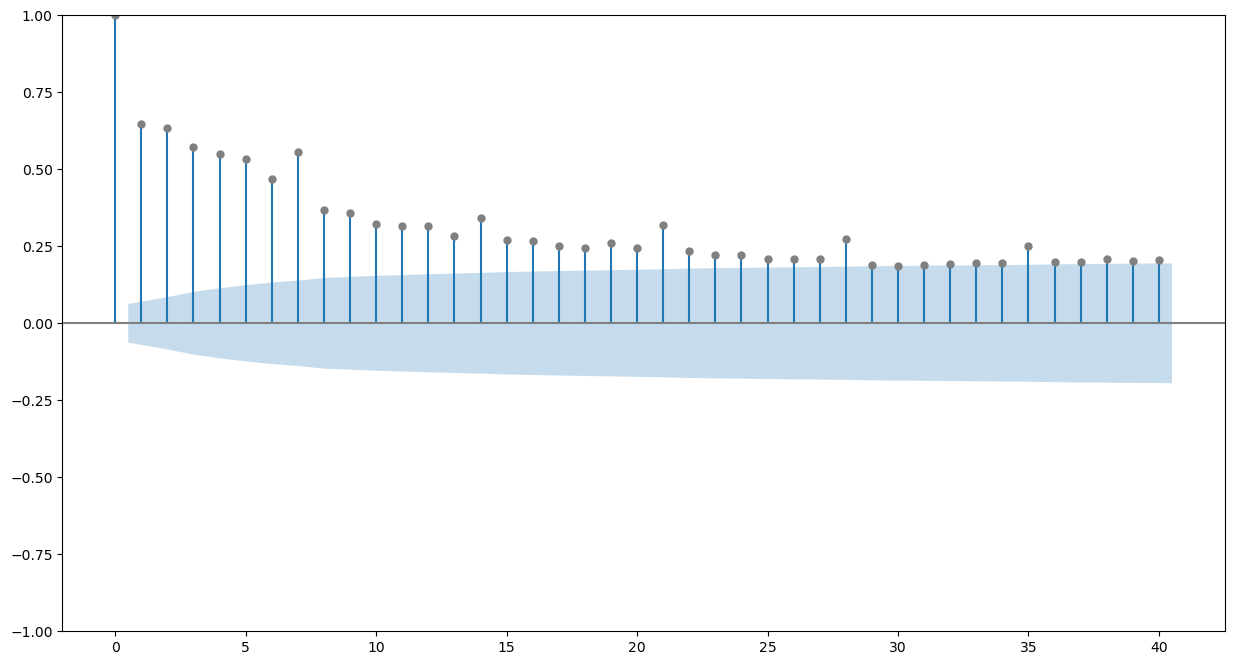

In [7]:
# Plot the autocorrelation
fig, ax = plt.subplots(figsize=(15, 8))
plot_acf(L_3['quantity'], lags=40, ax=ax, color='grey')
ax.set_title('')
# Save the figure
#plt.savefig("../data/figures/autocorrelation.png", dpi=300)
plt.show()

## Median Orders Per Time Window

In [8]:
# Aggregate Data
df_c["date"] = pd.to_datetime(df_c.date)
df_c_agg = df_c.groupby("date",as_index=False).sum()

/var/folders/d1/4c4_qxp904j46j9r74vbnkd80000gn/T/ipykernel_75747/2774522367.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_c_agg = df_c.groupby("date",as_index=False).sum()


In [9]:
# Total Sales per Weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Total Sales per Week 
df_week_days = df_c_agg.groupby(df_c_agg["date"].dt.day_name()).median().reindex(weekdays)
#df_week_days.reindex(weekdays).head()

# Total Sales per Week of year
df_week = df_c_agg.groupby(df_c_agg["date"].dt.week).median()

# Total Sales per Month 
df_month = df_c_agg.groupby(df_c_agg["date"].dt.month).median()

# Total Sales per Day of Year
df_day_year = df_c_agg.groupby(df_c_agg["date"].dt.dayofyear).median()

# Day of Month 
df_day_month = df_c_agg.groupby(df_c_agg["date"].dt.day).median()

# Week of Month
df_c_agg['tm_dm'] = df_c_agg.date.dt.day.astype(np.int8)  # Day of month
df_c_agg['tm_wm'] = df_c_agg['tm_dm'].apply(lambda x: math.ceil(x / 7)).astype(np.int8)  # number of week in month
df_week_month = df_c_agg.groupby("tm_wm").median()

/var/folders/d1/4c4_qxp904j46j9r74vbnkd80000gn/T/ipykernel_75747/1942966071.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_week_days = df_c_agg.groupby(df_c_agg["date"].dt.day_name()).median().reindex(weekdays)
/var/folders/d1/4c4_qxp904j46j9r74vbnkd80000gn/T/ipykernel_75747/1942966071.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_week = df_c_agg.groupby(df_c_agg["date"].dt.week).median()
/var/folders/d1/4c4_qxp904j46j9r74vbnkd80000gn/T/ipykernel_75747/1942966071.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the fun

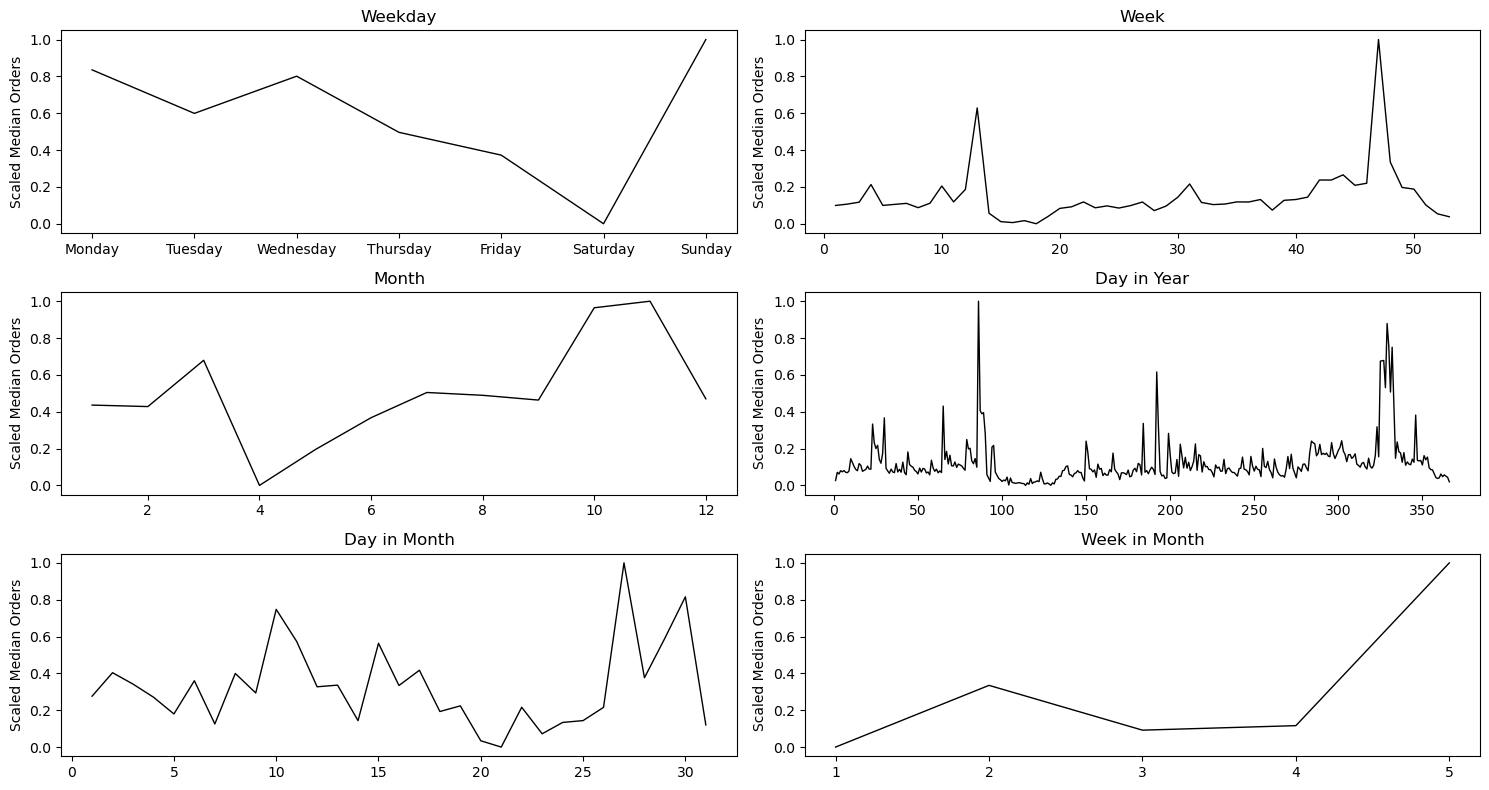

In [10]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Color
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# Get Graphs for different time frames 
example_df = [df_week_days, df_week, df_month, df_day_year, df_day_month, df_week_month]
title_g = ["Weekday", "Week", "Month", "Day in Year", "Day in Month", "Week in Month"]

fig, axs = plt.subplots(3, 2, figsize=(15, 8))
axs = axs.flatten()
ax_idx = 0

for df in example_df:
    # Extract and scale the relevant data
    data = df["quantity"]
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    
    # Plot the scaled data
    axs[ax_idx].plot(data.index, scaled_data, color="black", lw=1)
    axs[ax_idx].set_title(title_g[ax_idx])
    axs[ax_idx].set_ylabel("Scaled Median Orders")
    
    # Get the number of y-ticks
    n = len(axs[ax_idx].get_yticks())

      # Set y-ticks to only 0 and 1
    axs[ax_idx].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    #axs[ax_idx].set_yticklabels(['0', "0.2", "0.4", "0.6", "0.8",'1'])
    
    # If it's the last subplot, adjust the x-ticks
    if ax_idx == len(example_df) - 1:  # Check if it's the last subplot
        axs[ax_idx].set_xticks([1, 2, 3, 4, 5])  # Set x-ticks to whole numbers for 'Week in Month'
    
    ax_idx += 1

plt.tight_layout()
plt.savefig("../data/figures/time_series_dimensions.png", dpi=300)
plt.show()


# Total timesries

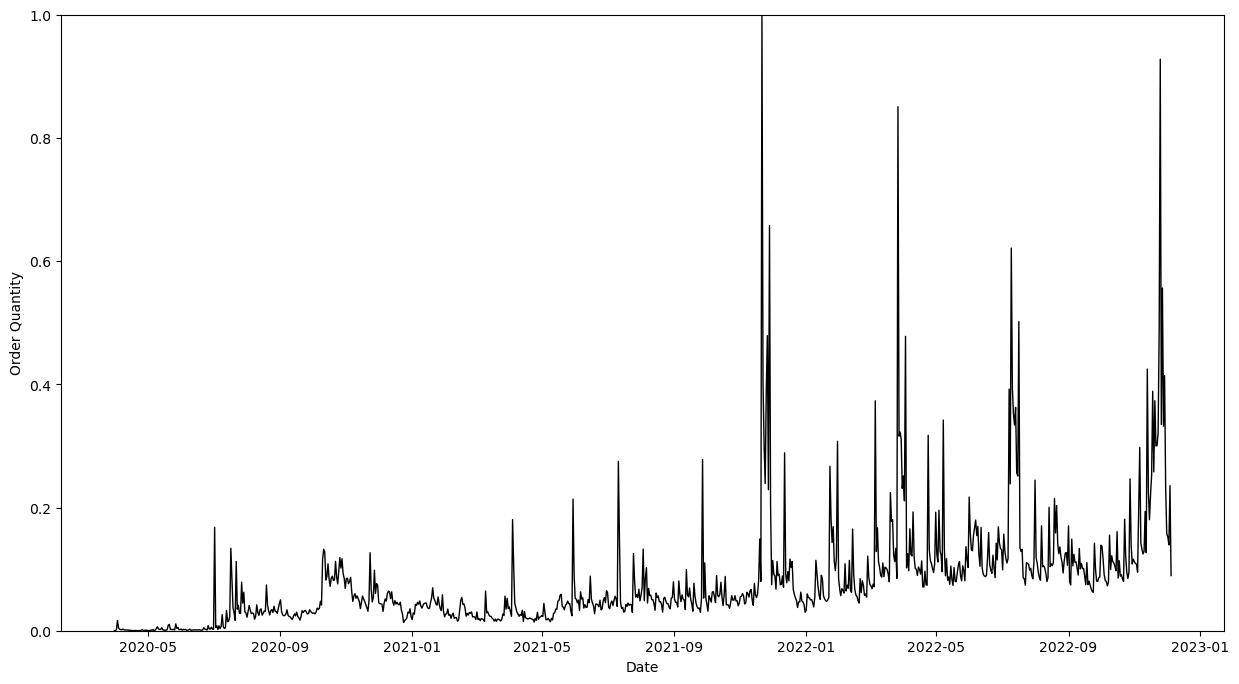

In [23]:

from sklearn.preprocessing import MinMaxScaler

# Assuming df_c_agg is your DataFrame and it's already defined

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape 'quantity' for scaling (it expects a 2D array)
quantity_scaled = scaler.fit_transform(df_c_agg['quantity'].values.reshape(-1, 1))

# Replace the original 'quantity' column with the scaled data
df_c_agg['quantity_scaled'] = quantity_scaled

# Set the figure size
plt.figure(figsize=(15, 8))

# Plot the data
plt.plot(df_c_agg['date'], df_c_agg['quantity_scaled'], color='black', lw=1)

# Set the y-axis limit
plt.ylim(0, 1)

# Labeling
plt.ylabel('Order Quantity')
plt.xlabel('Date')

# Display the plot
plt.show()

# Amount of TS 

In [43]:
# calculate the number of time series that are forecasted

# total = 1
# 
# number of 
nr_total = 1
nr_warehouse = df_c.warehouse_chain.nunique()
nr_shop = df_c.new_customer_id.nunique()

nr_ts = nr_total + nr_warehouse + nr_shop

print(f"Total number of time series that are forecasted = {nr_ts}, total = {nr_total}, warehouse = {nr_warehouse}, shop = {nr_shop}")

Total number of time series that are forecasted = 59, total = 1, warehouse = 3, shop = 55
